In [1]:
%matplotlib inline

# Composing `f o g`

$f$ and $g$ are learned: let's try the final model on the test set.

## 1. `import` stuff

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cPickle as pkl

from sklearn import metrics
from sklearn.pipeline import Pipeline
# from adenine.utils.extensions import Imputer
from fancyimpute import KNN
from sklearn.preprocessing import MinMaxScaler

## 2. Load data

In [4]:
data_ts_vvr = pd.read_csv('../../data/AISM/dataset_12-2017/vvr_dataset/vvr_test_data.csv', header=0, index_col=0)
print(data_ts_vvr.shape)
data_tr_vvr = pd.read_csv('../../data/AISM/dataset_12-2017/vvr_dataset/vvr_training_data.csv', header=0, index_col=0)
print(data_tr_vvr.shape)
labels_ts_clf = pd.read_csv('../../data/AISM/dataset_12-2017/labels_test.csv',  header=0, index_col=0)
print(labels_ts_clf.shape)

(714, 145)
(1946, 145)
(942, 1)


In [5]:
# __data_tr = pd.read_csv('../learning_g/vvr_dataset_03-2017/vvr_training_data.csv', header=0, index_col=0)
# data_ts_vvr = pd.read_csv('../learning_g/vvr_dataset_03-2017/vvr_test_data.csv', header=0, index_col=0)
# labels_ts_clf = pd.read_csv('../../dataset_03-2017/labels_test.csv', header=0, index_col=0)

idx = np.intersect1d(data_ts_vvr.index, labels_ts_clf.index)
print(idx)

['ID:101_S05' 'ID:105_S07' 'ID:106_S05' 'ID:106_S06' 'ID:106_S07'
 'ID:106_S08' 'ID:106_S09' 'ID:106_S10' 'ID:108_S05' 'ID:108_S06'
 'ID:108_S07' 'ID:108_S08' 'ID:108_S09' 'ID:111_S05' 'ID:111_S06'
 'ID:111_S07' 'ID:114_S05' 'ID:114_S06' 'ID:114_S07' 'ID:114_S08'
 'ID:114_S09' 'ID:114_S10' 'ID:121_S05' 'ID:122_S05' 'ID:122_S06'
 'ID:122_S07' 'ID:122_S08' 'ID:123_S05' 'ID:123_S06' 'ID:123_S07'
 'ID:123_S08' 'ID:123_S09' 'ID:127_S05' 'ID:127_S06' 'ID:129_S05'
 'ID:129_S06' 'ID:131_S05' 'ID:131_S06' 'ID:132_S05' 'ID:133_S05'
 'ID:133_S06' 'ID:133_S07' 'ID:133_S08' 'ID:138_S05' 'ID:138_S06'
 'ID:138_S07' 'ID:148_S05' 'ID:148_S06' 'ID:151_S05' 'ID:151_S06'
 'ID:151_S07' 'ID:151_S08' 'ID:157_S05' 'ID:157_S06' 'ID:157_S07'
 'ID:163_S05' 'ID:163_S06' 'ID:165_S05' 'ID:165_S06' 'ID:165_S07'
 'ID:169_S05' 'ID:169_S06' 'ID:173_S05' 'ID:177_S05' 'ID:177_S06'
 'ID:177_S07' 'ID:177_S08' 'ID:184_S05' 'ID:184_S06' 'ID:184_S07'
 'ID:184_S08' 'ID:188_S05' 'ID:188_S06' 'ID:192_S05' 'ID:192_S06'
 'ID:195_S

In [6]:
# imp = Imputer(strategy='nn')
pp = MinMaxScaler(feature_range=(0, 1))
# data_pipe = Pipeline([('imputing', imp),
#                      ('preproc', pp)])
data_tr_vvr = pd.DataFrame(data=KNN(k=3).complete(data_tr_vvr.values), index=data_tr_vvr.index, columns=data_tr_vvr.columns)
data_ts_vvr = pd.DataFrame(data=KNN(k=3).complete(data_ts_vvr.values), index=data_ts_vvr.index, columns=data_ts_vvr.columns)
X_tr = pp.fit_transform(data_tr_vvr.values)

X_ts = pp.transform(data_ts_vvr.loc[idx].values)
labels_ts_clf = labels_ts_clf.loc[idx]

print(X_ts.shape)
print(labels_ts_clf.shape)

Imputing row 1/1946 with 0 missing, elapsed time: 2.398
Imputing row 101/1946 with 8 missing, elapsed time: 2.402
Imputing row 201/1946 with 2 missing, elapsed time: 2.407
Imputing row 301/1946 with 3 missing, elapsed time: 2.411
Imputing row 401/1946 with 2 missing, elapsed time: 2.417
Imputing row 501/1946 with 0 missing, elapsed time: 2.420
Imputing row 601/1946 with 0 missing, elapsed time: 2.425
Imputing row 701/1946 with 1 missing, elapsed time: 2.428
Imputing row 801/1946 with 0 missing, elapsed time: 2.430
Imputing row 901/1946 with 2 missing, elapsed time: 2.434
Imputing row 1001/1946 with 0 missing, elapsed time: 2.438
Imputing row 1101/1946 with 3 missing, elapsed time: 2.441
Imputing row 1201/1946 with 1 missing, elapsed time: 2.444
Imputing row 1301/1946 with 0 missing, elapsed time: 2.447
Imputing row 1401/1946 with 0 missing, elapsed time: 2.451
Imputing row 1501/1946 with 2 missing, elapsed time: 2.455
Imputing row 1601/1946 with 4 missing, elapsed time: 2.460
Imputing 

In [7]:
yy = np.where(labels_ts_clf.values == 'SP', 1, -1).ravel()

0.5 + (np.abs(yy.sum())) / (len(yy)*2.0)

0.6152597402597403

## 3. Load best models

In [8]:
vvr = pkl.load(open('ENETVVR_estimator.pkl','rb')).best_estimator_
print(vvr)

MultiTaskElasticNet(alpha=0.003359818286283781, copy_X=True,
          fit_intercept=True, l1_ratio=1.0, max_iter=1000, normalize=False,
          random_state=None, selection='cyclic', tol=0.0001,
          warm_start=False)


/home/samu/miniconda2/lib/python2.7/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator MultiTaskElasticNet from version 0.20.dev0 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/samu/miniconda2/lib/python2.7/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator GridSearchCV from version 0.20.dev0 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [9]:
clf = pkl.load(open('winner_model.pkl', 'rb')).best_estimator_.steps[1][1]
print(clf)

/home/samu/miniconda2/lib/python2.7/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator MinMaxScaler from version 0.20.dev0 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/samu/miniconda2/lib/python2.7/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.dev0 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.8111111111111111,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)


/home/samu/miniconda2/lib/python2.7/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.20.dev0 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/samu/miniconda2/lib/python2.7/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator Pipeline from version 0.20.dev0 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


## 4. Run predictions

In [10]:
data_pred = vvr.predict(X_ts)
data_pred.shape
y_pred = clf.predict(data_pred)
y_pred = np.where(y_pred == 1, 'SP', 'RR')

In [13]:
print("acc: {}".format(metrics.accuracy_score(labels_ts_clf.values, y_pred)))
print("prec: {}".format(metrics.precision_score(labels_ts_clf.values, y_pred, pos_label='SP')))
print("rcll: {}".format(metrics.recall_score(labels_ts_clf.values, y_pred, pos_label='SP')))
print("f1: {}".format(metrics.f1_score(labels_ts_clf.values, y_pred, pos_label='SP')))
print("mcc: {}".format(metrics.matthews_corrcoef(labels_ts_clf.values, y_pred)))

acc: 0.826298701299
prec: 0.88202247191
rcll: 0.828496042216
f1: 0.854421768707
mcc: 0.641579406002


In [14]:
len(y_pred)

616

In [36]:
cm = metrics.confusion_matrix(labels_ts_clf.values, y_pred)

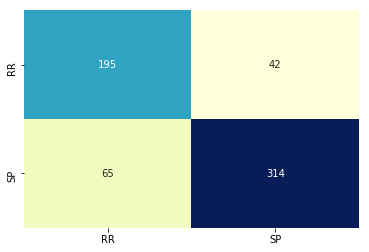

In [41]:
import seaborn as sns
plt.clf()
sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt='2.0f', cbar=False)
plt.xticks([0.5,1.5], ['RR', 'SP'])
plt.yticks([0.5,1.5], ['RR', 'SP']);

In [42]:
len(np.where(labels_ts_clf.values == 'RR')[0])

237

In [43]:
195+42

237